<a href="https://colab.research.google.com/github/2303a52351-Saniya/Generative-AI-2025/blob/main/gen_7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.4656 - loss: 0.7464 - val_accuracy: 0.5974 - val_loss: 0.6465
Epoch 2/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6743 - loss: 0.6023 - val_accuracy: 0.6883 - val_loss: 0.5803
Epoch 3/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6793 - loss: 0.5650 - val_accuracy: 0.7013 - val_loss: 0.5513
Epoch 4/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7316 - loss: 0.5190 - val_accuracy: 0.7662 - val_loss: 0.5422
Epoch 5/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7527 - loss: 0.5094 - val_accuracy: 0.7403 - val_loss: 0.5417
Epoch 6/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7530 - loss: 0.4948 - val_accuracy: 0.7013 - val_loss: 0.5414
Epoch 7/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7600 - loss: 0.5019 - val_accuracy: 0.7143 - val_loss: 0.5372
Epoch 8/250
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7895 - loss: 0.4655 - val_accuracy: 0.7013 - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Accuracy: 0.7403
Precision: 0.6562
Recall: 0.7000
F1 Score: 0.6774
Confusion Matrix:
[[36 11]
 [ 9 21]]


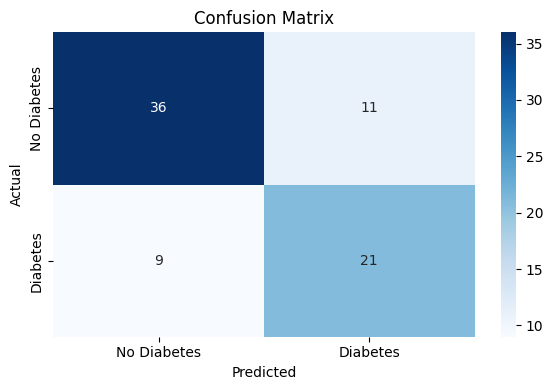

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score,
    recall_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/diabetes.csv')

# Split features and target
x = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split data into training, validation, and test sets
x_train, x_test1, y_train, y_test1 = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test1, y_test1, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

# Define the model architecture
def diabetes_prediction_model(shape):
    model = Sequential()
    model.add(Dense(10, activation='tanh', input_shape=(shape,)))
    model.add(Dense(15, activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(10, activation='tanh'))
    model.add(Dense(5, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Build and compile the model
diabetes_model = diabetes_prediction_model(x_train.shape[1])
diabetes_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = diabetes_model.fit(
    x_train_scaled, y_train,
    validation_data=(x_val_scaled, y_val),
    epochs=250, batch_size=32
)

# Save the model
diabetes_model.save('diabetes_model.h5')

# Load the model
loaded_model = load_model('diabetes_model.h5')

# Predict and evaluate
y_pred_probs = loaded_model.predict(x_test_scaled)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()
